In [364]:
import pandas as pd
import numpy as np
import pandas_ta as pta
import ta
# from datapackage import Package
# from selenium import webdriver
# import requests
# from bs4 import BeautifulSoup
# import yfinance as yf
import os
import random
import shutil
import time
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from tensorflow.keras.utils import plot_model
import graphviz
import pydot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [365]:
ticker_code = "A"
csv_file = "data/" + ticker_code + ".csv"
shift = -1
dataset = pd.read_csv(csv_file)
dataset = dataset.drop(columns=["Date", "Dividends", "Stock Splits"])
train_set_len = int(len(dataset) * 0.8)
train_set = dataset[:train_set_len]
test_set = dataset[train_set_len:]
X_train = train_set.drop(columns=["Close"])[:shift]
y_train = train_set["Close"].shift(shift).dropna()
X_test = test_set.drop(columns=["Close"])[:shift]
y_test = test_set["Close"].shift(shift).dropna()
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(np.array(y_train).reshape(-1,1))
X_test_scaled = x_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(np.array(y_test).reshape(-1,1))

In [366]:
dataset

,Open,High,Low,Close,Volume
0,27.847825,30.602008,24.481605,26.929766,62546380
1,26.279467,26.317721,24.366844,24.711117,15234146
2,25.284907,26.929766,24.519857,26.929766,6577870
3,26.011706,26.700252,24.481606,24.481606,5975611
4,24.558106,25.667429,24.481600,25.131893,4843231
...,...,...,...,...,...
5789,145.619995,147.160004,144.429993,145.139999,1691900
5790,151.979996,157.440002,151.979996,156.860001,3512500
5791,156.669998,157.279999,154.350006,155.350006,1444100
5792,155.089996,156.960007,154.710007,156.960007,642700


In [367]:
X_test_scaled.shape, X_train_scaled.shape

((1158, 4), (4634, 4))

In [368]:
steps = 30
X_train_list = []
for i in range(steps, len(X_train_scaled)):
	X_train_list.append(X_train_scaled[i-steps:i])
X_train_list = np.array(X_train_list)

In [369]:
X_train_list.shape, X_test_scaled.shape

((4604, 30, 4), (1158, 4))

In [370]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(steps, X_train_list.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(units=1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_list, y_train_scaled[:(steps * -1)], epochs=100, batch_size=32)

Epoch 1/100
144/144 [==============================] - 27s 103ms/step - loss: 0.0034
Epoch 2/100
144/144 [==============================] - 13s 92ms/step - loss: 7.3427e-04
Epoch 3/100
144/144 [==============================] - 14s 95ms/step - loss: 6.4169e-04
Epoch 4/100
144/144 [==============================] - 13s 92ms/step - loss: 5.3361e-04
Epoch 5/100
144/144 [==============================] - 13s 91ms/step - loss: 5.7254e-04
Epoch 6/100
144/144 [==============================] - 13s 91ms/step - loss: 5.4086e-04
Epoch 7/100
144/144 [==============================] - 13s 90ms/step - loss: 5.2478e-04
Epoch 8/100
144/144 [==============================] - 14s 96ms/step - loss: 3.8879e-04
Epoch 9/100
144/144 [==============================] - 14s 94ms/step - loss: 3.5908e-04
Epoch 10/100
144/144 [==============================] - 14s 96ms/step - loss: 3.5942e-04
Epoch 11/100
144/144 [==============================] - 13s 94ms/step - loss: 3.1669e-04
Epoch 12/100
144/144 [===========

In [385]:
X_test_list = []
for i in range(steps, len(X_test_scaled)):
	X_test_list.append(X_test_scaled[i-steps:i])

In [386]:
X_test_list, y_test = np.array(X_test_list), np.array(y_test)

In [387]:
X_test_list.shape

(1128, 30, 4)

In [388]:
model.evaluate(X_test_list, y_test_scaled[:(steps * -1)])

36/36 [==============================] - 4s 35ms/step - loss: 0.1392


0.13917352259159088

array([], dtype=float64)

In [389]:
pred = model.predict(X_test_list)
pred2 = model.predict(X_train_list)

144/144 [==============================] - 5s 35ms/step


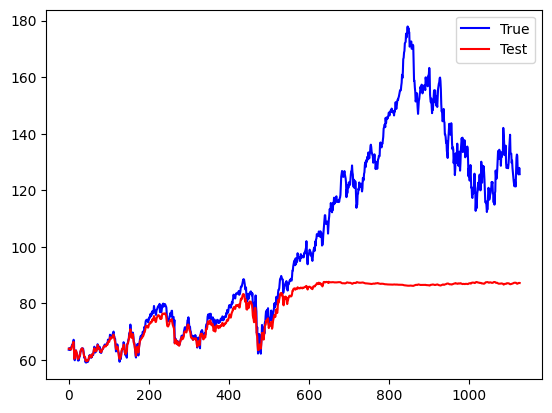

In [390]:
import matplotlib.pyplot as plt

plt.plot(y_test[:(steps * -1)], label="True", c = "blue")
plt.plot(y_scaler.inverse_transform(pred), label="Test", c = "red")
plt.legend()
plt.show()

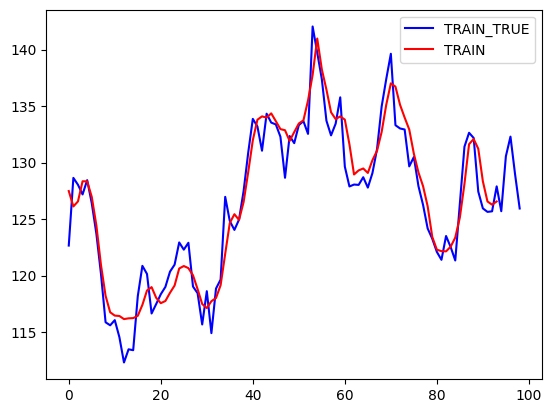

In [343]:

plt.plot(y_train, label = "TRAIN_TRUE", c = "blue")
plt.plot(y_scaler.inverse_transform(pred2), label="TRAIN", c = "red")
plt.legend()
plt.show()

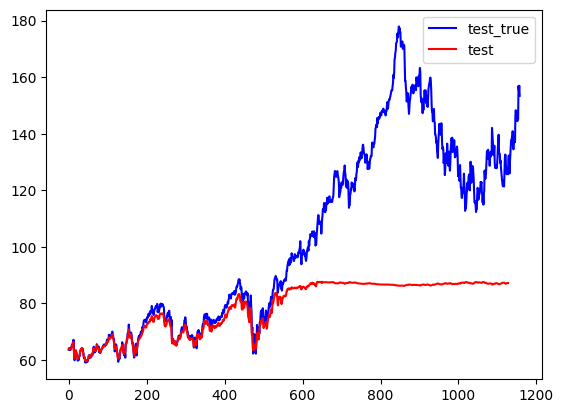

In [391]:

plt.plot(y_test, label = "test_true", c = "blue")
plt.plot(y_scaler.inverse_transform(pred), label="test", c = "red")
plt.legend()
plt.show()